<a href="https://colab.research.google.com/github/amritigupta/ML-project-customer-churn/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assessing the value of data

**Problem statement:** The bank wants to create more value out of its customer data. Analyze the data and propose how internal and external utilization of the analysis results increases the banks revenues.

In [ ]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# __1. Initial Data Analysis__

In [ ]:
# loading the csv dataset as pandas dataframe

data = pd.read_csv('Churn_Modelling.csv')

In [ ]:
# check sample of the data

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# detailed information on each column of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Statistical description of the dataset

data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Describing each column feature

* __RowNumber__: Row number for the row in the data table.
* __CustomerId__: Unique Identification number of the customer.
* __Surname__: Surname (Lastname) of the customer.
* __CreditScore__: Credit Score of the customer.
* __Geography__: Geographical location (country) of the customer.
* __Gender__: Gender of the customer (Male / Female).
* __Age__: Age of the customer.
* __Tenure__: Number of years the customers has been associated with the bank.
* __Balance__: The amount of balance in the customer's account.
* __NumOfProducts__: 
* __HasCrCard__: Denotes if the customer owns a credit card with the bank.
* __IsActiveMember__: Denotes if the customer is active with the bank.
* __EstimatedSalary__: Estimated salary of the customer.
* __Exited__: Denotes if the customer has churned (exited) from the bank or not.

## Data type of each column feature variable

In [ ]:
# data type of each columns feature variable

data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### __<font color='green'>Analysis</font>__

* All the columns except ___Surname___, ___Geography___, and ___Gender___ are of numerical data types.

# __2. Data Preprocessing__

## 2.1. Deleting Unnecessary Information

The columns ___RowNumber___, ___CustomerId___, and ___Surname___ are related to personal data of the customers. These columns do not have any quantitative impact on any calculations whatsoever. Hence, we can avoid these extra columns of information by removing them from the data.

In [ ]:
# sample of data before deleting the unnecessary columns

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# deleting the unnecessary columns (RowNumber, CustomerId, Surname)

data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
# sample of data after deleting the unnecessary columns

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2.2. Dealing with NULL or missing data

Often, we may find missing data or NULL data in certain columns of a dataframe or dataset. Such NULL data values not only pose problems in the analysis, but also terminate any mathematical calculations that are carried out on the dataset without dealing with them. Therefore, we need to make sure that there are no such data cells in our dataset.

In [ ]:
# We can check if the pandas dataframe 'data' has any null values in each of its column using the isnull() function.
# Furthermore, the sum() function tells us the total null values in each column.

data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### __<font color='green'>Observation</font>__

Surprisingly, we do not find any NULL or missing values in this data. This is really good for our analysis.

# __3. Exploratory Data Analysis__

Now that we have preprocessed the data by removing unnecessary information from it, we can start an exploratory analysis to find possible correlations between different features (columns) of the data and resulting outcomes (possibly one data column). We will analyze each and every possible column in the data to measure its eligibility to be a valuable feature for the exit criteria of any customer.



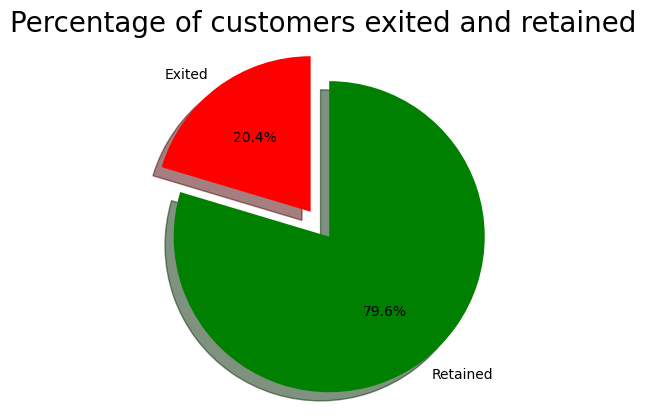

In [ ]:
# Pie chart to display the amount (percentage) of customers churned and the ones retained

labels = ['Exited', 'Retained']
sizes = [data.Exited[data['Exited'] == 1].count(), data.Exited[data['Exited'] == 0].count()]
explode = [0.1, 0]

# create and plot the pie chart

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, radius=0.5, colors=['r', 'g'], )
plt.title("Percentage of customers exited and retained", size = 20)
plt.axis('equal')
plt.show()

### __<font color='green'>Observation</font>__

From the given data, it is visible that around __20%__ of the people have exited or churned. So, we can try to create a machine learning model that can predict whether a customer will exit the bank or not given his/her banking data.

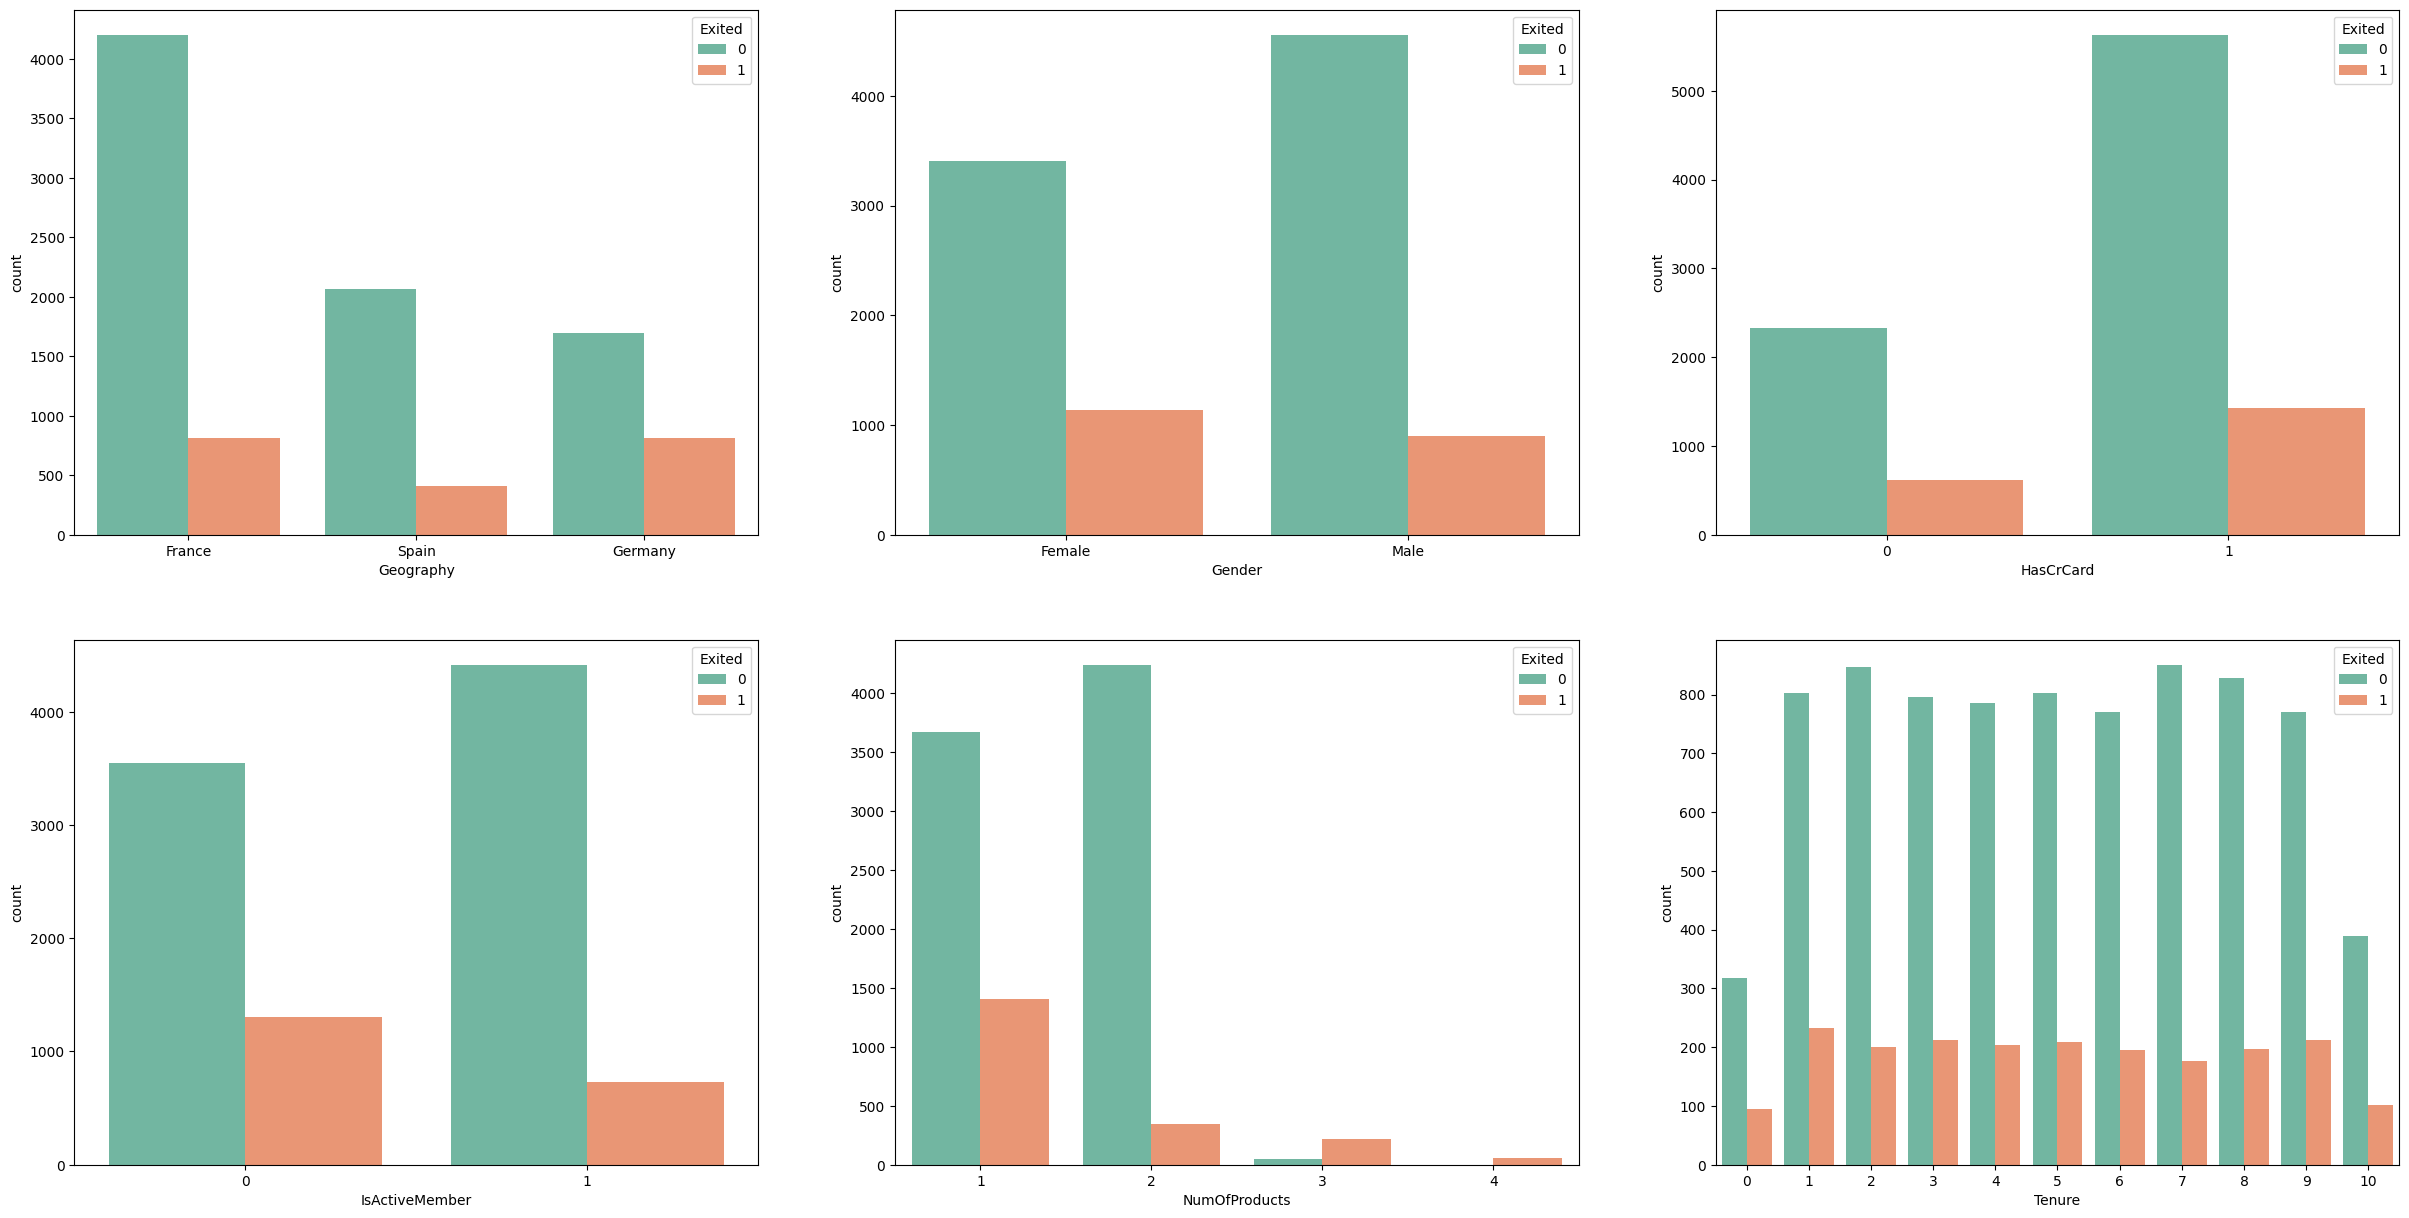

In [ ]:
# Count column plots to map the dependence of 'Exited' column on categorical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.countplot(x='Geography', hue='Exited', data=data, palette='Set2', ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited', data=data, palette='Set2', ax=ax[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=data, palette='Set2', ax=ax[0][2])
sns.countplot(x='IsActiveMember', hue='Exited', data=data, palette='Set2', ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=data, palette='Set2', ax=ax[1][1])
sns.countplot(x='Tenure', hue='Exited', data=data, palette='Set2', ax=ax[1][2])

plt.show()

### __<font color='green'>Observations</font>__

* __Geography:__ We can see that majority of the data is about people France. Ideally for an evenly-distributed data, if the amount of people from a place is the majority, then the majority of churning should also be within that group. However, it is not so in this case as we see that number of exited people who belong to Germany is almost equal to the number of exits from France.
* __Gender:__ We can clearly see the __Female customers__ had more exits than the male customers.
* __Credit cards:__ It is generally expected that people who have more interactions and products of the bank, would likely be retained for a longer time. However, we can see that people who have credit cards have more exits than those who do not own credit cards.
* __Active Member:__ This is an expected observation. We can see that inactive members have been churned more than members who are active.
* __Number of Products:__ This is also an expected observation, where we see that customers who own more products from the bank are likely to be retained for a longer time than those who own less products.
* __Tenure:__ We see that the tenure of a customer does not really tell us much if that customer is likely to be churned or not. Initially, it looks like new joinees and older people (10 years) have been churned less. However, on a closer analysis we can see that the overall number of retained customer are significantly less in both these cases. As a result, we can probably conclude that new joinees and older customers may be more likely to be churned as their churn rate (percentage) is likely to be higher than other tenure rates.

In [ ]:
# Calculate correlations between numeric features
correlations = data.corr()

# sort features in order of their correlation with "Exited"
sort_corr_cols = correlations.Exited.sort_values(ascending=False).keys()
sort_corr = correlations.loc[sort_corr_cols,sort_corr_cols]
sort_corr

<ipython-input-35-36c4275ae1c5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


,Exited,Age,Balance,EstimatedSalary,HasCrCard,Tenure,CreditScore,NumOfProducts,IsActiveMember
Exited,1.000000,0.285323,0.118533,0.012097,-0.007138,-0.014001,-0.027094,-0.047820,-0.156128
Age,0.285323,1.000000,0.028308,-0.007201,-0.011721,-0.009997,-0.003965,-0.030680,0.085472
Balance,0.118533,0.028308,1.000000,0.012797,-0.014858,-0.012254,0.006268,-0.304180,-0.010084
EstimatedSalary,0.012097,-0.007201,0.012797,1.000000,-0.009933,0.007784,-0.001384,0.014204,-0.011421
HasCrCard,-0.007138,-0.011721,-0.014858,-0.009933,1.000000,0.022583,-0.005458,0.003183,-0.011866
Tenure,-0.014001,-0.009997,-0.012254,0.007784,0.022583,1.000000,0.000842,0.013444,-0.028362
CreditScore,-0.027094,-0.003965,0.006268,-0.001384,-0.005458,0.000842,1.000000,0.012238,0.025651
NumOfProducts,-0.047820,-0.030680,-0.304180,0.014204,0.003183,0.013444,0.012238,1.000000,0.009612
IsActiveMember,-0.156128,0.085472,-0.010084,-0.011421,-0.011866,-0.028362,0.025651,0.009612,1.000000


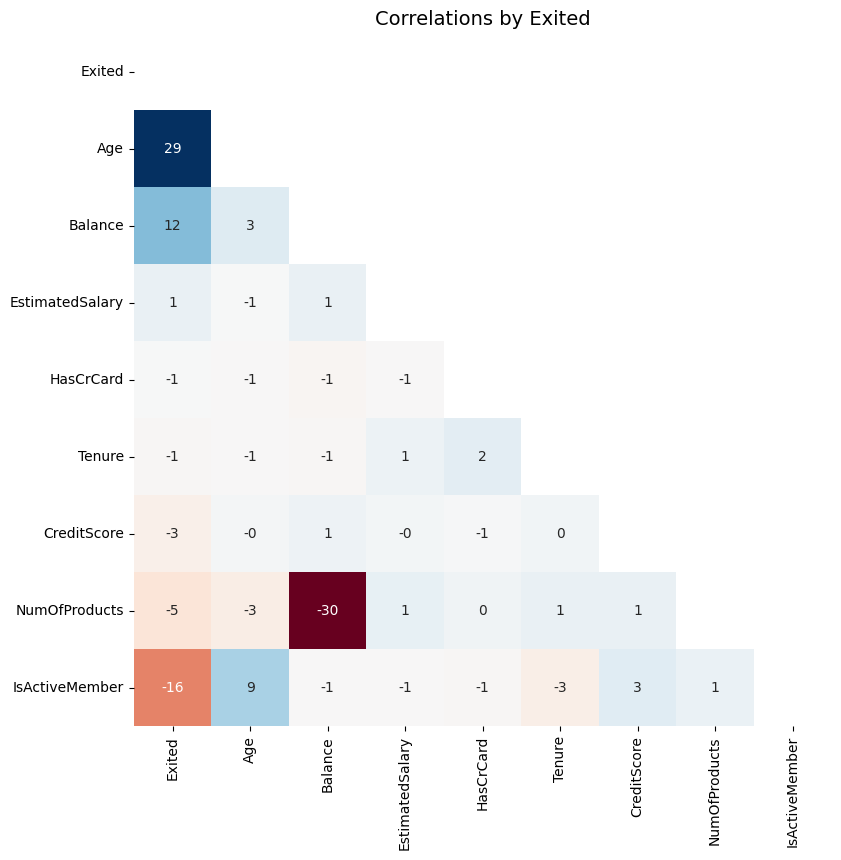

In [ ]:
# Generate a mask for the upper triangle
corr_mask = np.zeros_like(correlations)
corr_mask[np.triu_indices_from(corr_mask)] = 1

# Make the figsize 9x9
plt.figure(figsize=(9,9))

# Plot heatmap of annotated correlations; change background to white
##with sns.axes_style('white'):
sns.heatmap(sort_corr*100, 
                cmap='RdBu', 
                annot=True,
                fmt='.0f',
                mask=corr_mask,
                cbar=False)
    
plt.title('Correlations by Exited', fontsize=14)
plt.yticks(rotation=0)
plt.show()

### __<font color='green'>Observations</font>__

* __Credit Score:__ We can see that Credit Score does not have much effect on the customer churn.
* __Age:__ Here we can see that the older customers are more likely to be churned from the bank. This is most probably to keep a younger manpower in the organization.
* __Balance:__ When it comes to Balance, we see that the bank is losing a significant number of customers with high balance in their accounts. This is likely to affect the bank's capital as well.
* __Estimated Salary:__ Estimated Salary does not seem to affect the customer churn much.
* __Number of Products:__ We see that the number of products also does not seem to affect the customer churn.
* __Tenure:__ For tenure, as we can see here too, customer belonging more to the two extreme tenure groups (new joinees and older ones) are more likely to be churned.

# __4. Data Preparation__

We first create a training data set with the categorical variables and continuous variables. We also include the 'Exited' target variable in the data.

In [ ]:
# list of continuous and categorical variables/features

continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
categorical_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']

# separating the train and test data using a 80%-20% split

data_train = data.sample(frac=0.8, random_state=100)
data_test = data.drop(data_train.index)

# check the number of rows in each data set for verification

print('Number of rows in train data: ', len(data_train))
print('Number of rows in test data: ', len(data_test))

print()

data_train = data_train[['Exited'] + continuous_vars + categorical_vars]
data_train.head()

Number of rows in train data:  8000
Number of rows in test data:  2000



,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography,Gender
8018,1,632,23,3,122478.51,1,147230.77,1,0,Germany,Male
9225,0,594,32,4,120074.97,2,162961.79,1,1,Germany,Female
3854,0,687,33,9,135962.40,2,121747.96,1,0,Germany,Male
2029,0,520,33,4,156297.58,2,166102.61,1,1,France,Male
3539,0,667,42,6,0.00,1,88890.05,1,0,France,Male


Here, we change the 0 values of the variable columns __HasCrCard__ and __IsActiveMember__ into -1. This will allow us to include a negative relation in the modeling.

In [ ]:
# turning 0 values of numerical categorical features into -1
# to introduce negative relation in the calculations

data_train.loc[data_train.HasCrCard == 0, 'HasCrCard'] = -1
data_train.loc[data_train.IsActiveMember == 0, 'IsActiveMember'] = -1

data_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography,Gender
8018,1,632,23,3,122478.51,1,147230.77,1,-1,Germany,Male
9225,0,594,32,4,120074.97,2,162961.79,1,1,Germany,Female
3854,0,687,33,9,135962.40,2,121747.96,1,-1,Germany,Male
2029,0,520,33,4,156297.58,2,166102.61,1,1,France,Male
3539,0,667,42,6,0.00,1,88890.05,1,-1,France,Male


Next we one-hot encode the remaining text categorical variables __Geography__ and __Gender__.

In [ ]:
# list of categorical variables

var_list = ['Geography', 'Gender']

# turning the categorical variables into one-hot vectors

for var in var_list:
  for val in data_train[var].unique():
    data_train[var + '_' + val] = np.where(data_train[var] == val, 1, -1)

data_train = data_train.drop(var_list, axis=1)

data_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female
8018,1,632,23,3,122478.51,1,147230.77,1,-1,1,-1,-1,1,-1
9225,0,594,32,4,120074.97,2,162961.79,1,1,1,-1,-1,-1,1
3854,0,687,33,9,135962.40,2,121747.96,1,-1,1,-1,-1,1,-1
2029,0,520,33,4,156297.58,2,166102.61,1,1,-1,1,-1,1,-1
3539,0,667,42,6,0.00,1,88890.05,1,-1,-1,1,-1,1,-1


Next, we normalize the continuous variables between 0 and 1. This step is implemented so that there is no overflow of values during the calculations.

In [ ]:
min_values = data_train[continuous_vars].min()
max_values = data_train[continuous_vars].max()

data_train[continuous_vars] = (data_train[continuous_vars] - min_values) / (max_values - min_values)
data_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female
8018,1,0.564,0.067568,0.3,0.488160,0.000000,0.736166,1,-1,1,-1,-1,1,-1
9225,0,0.488,0.189189,0.4,0.478581,0.333333,0.814829,1,1,1,-1,-1,-1,1
3854,0,0.674,0.202703,0.9,0.541903,0.333333,0.608740,1,-1,1,-1,-1,1,-1
2029,0,0.340,0.202703,0.4,0.622952,0.333333,0.830534,1,1,-1,1,-1,1,-1
3539,0,0.634,0.324324,0.6,0.000000,0.000000,0.444435,1,-1,-1,1,-1,1,-1


# __5. Machine Learning classifiers (selecting optimal parameters)__

Here, we will try to train different machine learning classification models to our data. Once we get the model details for each of the models, we can select the best model from them for our training and testing purposes.

### __<font color='green'>Models</font>__

These are the models that we will try to use now:

* Logistic Regression
* Support Vector Machines (SVM) with different kernel methods
  * Linear kernel
  * RBF kernel
  * Poly kernel
* Random Forest Classifier


In [ ]:
# important libraries

from sklearn.model_selection import GridSearchCV

# models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# this method will show us the details of each model
# which will help us in deciding the best model

def best_model(model):
  print(model.best_score_)
  print(model.best_params_)
  print(model.best_estimator_)

Now we will try to fit different classifier models with a variety of parameters and use GridSearch algorithm to get the best set of parameters for each model.

In [ ]:
# Logistic Regression classifier


parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100],
              'max_iter': [50, 100, 200, 300], 
              'fit_intercept':[True],
              'intercept_scaling':[1],
              'penalty':['l2'],
              'tol':[0.00001, 0.0001, 0.000001]}

LR_grid_model = GridSearchCV(LogisticRegression(), 
                             param_grid=parameters, 
                             cv=10, 
                             refit=True, 
                             verbose=0)

LR_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)


best_model(LR_grid_model)

In [ ]:
# Support Vector Machines (RBF kernel)


parameters = {'C': [1, 10, 50, 100],
              'gamma': [0.1, 0.01, 0.001],
              'probability': [True],
              'kernel': ['rbf']}

SVM_rbf_grid_model = GridSearchCV(SVC(), 
                                  parameters, 
                                  cv=5, 
                                  refit=True, 
                                  verbose=0)

SVM_rbf_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

best_model(SVM_rbf_grid_model)

0.8466249999999998
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [ ]:
# Support Vector Machines (Poly kernel)

parameters = {'C': [1, 10, 50, 100],
              'gamma': [0.1, 0.01, 0.001],
              'probability': [True],
              'kernel': ['poly'],
              'degree': [2, 3]}

SVM_poly_grid_model = GridSearchCV(SVC(), 
                                   parameters, 
                                   cv=5, 
                                   refit=True, 
                                   verbose=0)

SVM_poly_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

best_model(SVM_poly_grid_model)

In [ ]:
# Random Forest Classifier

parameters = {'max_depth': [6, 7, 8, 9, 10], 
              'max_features': [5, 6, 7, 8, 9],
              'n_estimators':[10, 50, 100],
              'min_samples_split': [3, 5, 6, 7]}

RF_grid_model = GridSearchCV(RandomForestClassifier(),
                             parameters,
                             cv=10,
                             refit=True,
                             verbose=0)

RF_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

best_model(RF_grid_model)

0.8644999999999999
{'max_depth': 10, 'max_features': 5, 'min_samples_split': 3, 'n_estimators': 100}
RandomForestClassifier(max_depth=10, max_features=5, min_samples_split=3)


# __6. Machine Learning classifiers (fitting the best models)__

Here, we take the best models that we obtained from the previous step and try to fit them to our data.

In [54]:
# Logistic Regression

lr_model = LogisticRegression(C=0.1, class_weight=None, dual=False, 
                              fit_intercept=True, intercept_scaling=1,
                              l1_ratio=None, max_iter=50, multi_class='auto',
                              n_jobs=None, penalty='l2', random_state=None,
                              solver='lbfgs', tol=1e-05, verbose=0,
                              warm_start=False)

lr_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

LogisticRegression(C=0.1, max_iter=50, tol=1e-05)

In [55]:
# SVM (RBF kernel)

svm_rbf_model = SVC(C=100, break_ties=False, cache_size=200, class_weight=None, 
                    coef0=0.0, decision_function_shape='ovr', degree=3,
                    gamma=0.1, kernel='rbf', max_iter=-1, probability=True,
                    random_state=None, shrinking=True, tol=0.001,
                    verbose=False)

svm_rbf_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

SVC(C=100, gamma=0.1, probability=True)

In [56]:
# SVM (Poly kernel)

svm_poly_model = SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=2,
                     gamma=0.1, kernel='poly', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False)

svm_poly_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [58]:
# Random Forest classifier

rf_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                  class_weight=None, criterion='gini', 
                                  max_depth=9, max_features=9,
                                  max_leaf_nodes=None, max_samples=None,
                                  min_impurity_decrease=0.0, 
                                   min_samples_leaf=1, 
                                  min_samples_split=7, 
                                  min_weight_fraction_leaf=0.0, n_estimators=50,
                                  n_jobs=None, oob_score=False,
                                  random_state=None, verbose=0,
                                  warm_start=False)

rf_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

RandomForestClassifier(max_depth=9, max_features=9, min_samples_split=7,
                       n_estimators=50)

# __7. Machine Learning classifiers (visualizations)__


Now that we have the best trained models, we need to check the classification reports to track the precision, recall, and f1-score values of each model. After that, we proceed to plot ROC graphs for each to compare their performance against each other.

In [59]:
print('[INFO] Logistic Regression classifier: \n')
print(classification_report(data_train.Exited, lr_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] Logistic Regression classifier: 

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      6382
           1       0.69      0.15      0.25      1618

    accuracy                           0.81      8000
   macro avg       0.75      0.57      0.57      8000
weighted avg       0.79      0.81      0.76      8000



In [60]:
print('[INFO] SVM (RBF) classifier:\n')
print(classification_report(data_train.Exited, svm_rbf_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] SVM (RBF) classifier:

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6382
           1       0.84      0.38      0.53      1618

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.86      0.86      0.84      8000



In [61]:
print('[INFO] SVM (Poly) classifier:\n')
print(classification_report(data_train.Exited, svm_poly_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] SVM (Poly) classifier:

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      6382
           1       0.81      0.36      0.50      1618

    accuracy                           0.85      8000
   macro avg       0.83      0.67      0.71      8000
weighted avg       0.85      0.85      0.83      8000



In [62]:
print('[INFO] Random Forest classifier:\n')
print(classification_report(data_train.Exited, rf_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] Random Forest classifier:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6382
           1       0.89      0.57      0.69      1618

    accuracy                           0.90      8000
   macro avg       0.89      0.77      0.82      8000
weighted avg       0.90      0.90      0.89      8000



Now we will try to visualize the __Receiver Operating Characteristic (ROC)__ scores and the __Area Under Curve (AUC)__ for each of the trained classifier models.

In [63]:
def get_roc(y, predict_vals, prob_values):
  roc_score = roc_auc_score(y, predict_vals)
  false_positives, true_positives, _ = roc_curve(y, prob_values)
  return (roc_score, false_positives, true_positives)

In [64]:
y = data_train.Exited
X = data_train.loc[:, data_train.columns != 'Exited']

roc_lr, false_lr, true_lr = get_roc(y, lr_model.predict(X), lr_model.predict_proba(X)[:, 1])
roc_svm_rbf, false_svm_rbf, true_svm_rbf = get_roc(y, svm_rbf_model.predict(X), svm_rbf_model.predict_proba(X)[:, 1])
roc_svm_poly, false_svm_poly, true_svm_poly = get_roc(y, svm_poly_model.predict(X), svm_poly_model.predict_proba(X)[:, 1])
roc_rf, false_rf, true_rf = get_roc(y, rf_model.predict(X), rf_model.predict_proba(X)[:, 1])


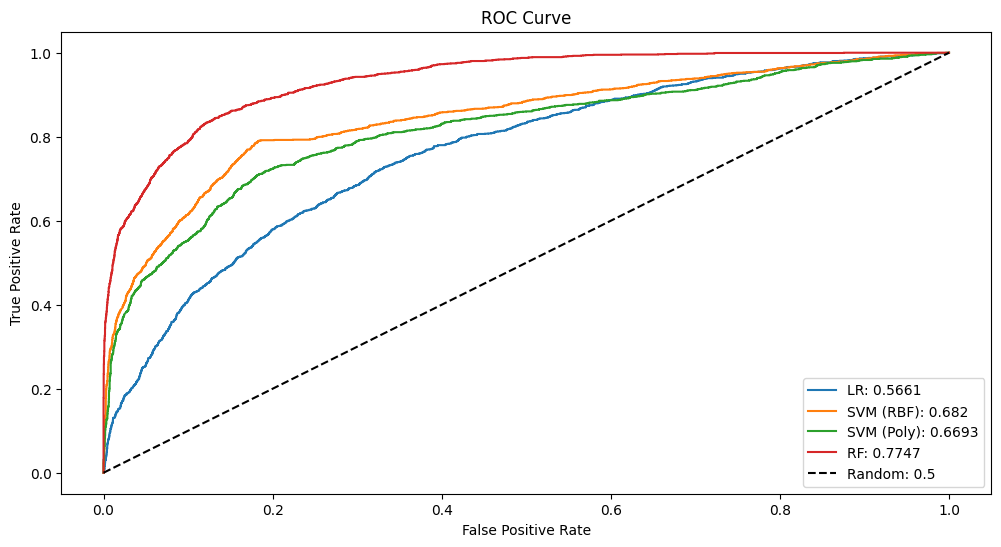

In [65]:
plt.figure(figsize = (12,6), linewidth = 2)

plt.plot(false_lr, true_lr, label = 'LR: ' + str(round(roc_lr, 4)))
plt.plot(false_svm_rbf, true_svm_rbf, label = 'SVM (RBF): ' + str(round(roc_svm_rbf, 4)))
plt.plot(false_svm_poly, true_svm_poly, label = 'SVM (Poly): ' + str(round(roc_svm_poly, 4)))
plt.plot(false_rf, true_rf, label = 'RF: ' + str(round(roc_rf, 4)))

plt.plot([0, 1], [0, 1], 'k--', label = 'Random: 0.5')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

plt.show()

### __<font color='green'>Observation</font>__

From the above graph, we can clearly see that the __Random Forest (RF) classifier has the highest ROC score (0.7733)__ and hence covers the highest area under curve as well. From this, we finally choose the Random Forest classifier with its optimal parameters as our final machine learning classifier model. Let us now try to use this model with our test data and see how it works out.



# __8. Machine Learning classifiers (Test Accuracy)__

Now that we have the classifier we want to use (Random Forest classifier), we will try to use it on a test set and analyze how well our model behaves.


In [66]:
data_test = data_test[['Exited'] + continuous_vars + categorical_vars]

# Change the 0 in categorical variables to -1

data_test.loc[data_test.HasCrCard == 0, 'HasCrCard'] = -1
data_test.loc[data_test.IsActiveMember == 0, 'IsActiveMember'] = -1

# One hot encode the categorical variables

var_list = ['Geography', 'Gender']

for var in var_list:
  for val in data_test[var].unique():
    data_test[var + '_' + val] = np.where(data_test[var] == val, 1, -1)

data_test = data_test.drop(var_list, axis=1)

# Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data

columns_list = list(set(data_train.columns) - set(data_test.columns))

for column in columns_list:
    data_test[str(column)] = -1

# MinMax scaling of the continuous variables based on min and max from the train data

data_test[continuous_vars] = (data_test[continuous_vars] - min_values) / (max_values - min_values)

# Ensure that The variables are ordered in the same way as was ordered in the train set

data_test = data_test[data_train.columns]

<ipython-input-66-157bc21d6723>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[var + '_' + val] = np.where(data_test[var] == val, 1, -1)
<ipython-input-66-157bc21d6723>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[var + '_' + val] = np.where(data_test[var] == val, 1, -1)
<ipython-input-66-157bc21d6723>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [67]:
# mask infinite values and delete not available or missing values from columns

data_test = data_test.mask(np.isinf(data_test))
data_test = data_test.dropna()

print(data_test.shape)

(2000, 14)


In [68]:
# classification report for the test data

print(classification_report(data_test.Exited,  rf_model.predict(data_test.loc[:, data_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1581
           1       0.80      0.49      0.61       419

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.85      2000



In [69]:
# calculate the ROC score, false positives, and true positives

roc_rf_test, false_rf_test, true_rf_test = get_roc(data_test.Exited, 
                                                   rf_model.predict(data_test.loc[:, data_test.columns != 'Exited']), 
                                                   rf_model.predict_proba(data_test.loc[:, data_test.columns != 'Exited'])[:,1])

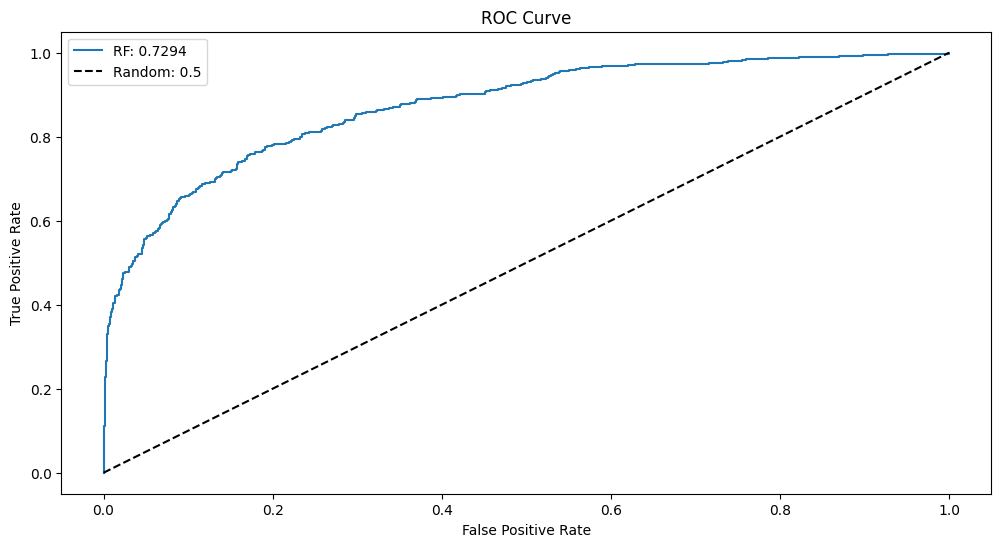

In [70]:
plt.figure(figsize = (12,6), linewidth = 2)

plt.plot(false_rf_test, 
         true_rf_test, 
         label = 'RF: ' + str(round(roc_rf_test, 4)))

plt.plot([0, 1], [0, 1], 'k--', label = 'Random: 0.5')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

plt.show()